<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_6_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
#@title('Indítás után')
%%capture
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt


from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

from mpl_toolkits.mplot3d import Axes3D


# Fuzzy következtetési rendszerek

Ebben a részben a a fuzzy következtetési rendszerek bemutatásával foglalkozom.

Ez az interkatív bemutató a fuzzy következtetést egyes lépésein át muatatja be az alapfogalmakat.

A jegyzetet Dr. Prof. Takács Márta tanárnő - Fuzzy következtetési rendszerek című tantárgyához készítettem a 2021/2 félévben.


### A tantárgy tartalma:
Fuzzy operátorcsaládok áttekintése. A következtetési rendszerek logikai, fuzzy logikai alapjai.
Bizonytalanság kezelése a következtetési rendszerekben. Általános fuzzy következtetési rendszerek. Szabályalapú rendszerek. Mamdani és Takagi-Sugeno módszer. Grafikus megjelenítés MATLAB környezetben. Új operátorcsaládokon alapuló következtetési rendszerek. Mérnöki alkalmazásokban megjelenő döntési problémák numerikus módszerekkel történő megoldásának lehetőségei, és a fuzzy következtetési rendszerek alkalmazásának lehetőségei. Gazdasági alkalmazásokban alkalmazott fuzzy következtetési rendszerek. Környezetvédelmi és természettudományi alkalmazások. 

http://aidi.uni-obuda.hu/sites/default/files/OE_AIAMDI_t%C3%A1rgyle%C3%ADr%C3%A1sok_2021.febru%C3%A1r.pdf

<a name="tartalom"></a>

## Tartalom

Bevezetés

> [A lágy számítási módszerekről](#a_lagy_szamitasi_modszerekrol)<br>
> [Fuzzy halmazok](#fuzzy_halmazok)<br>
> [Fuzzy tagsági függvények](#fuzzy_tagsagi_fuggvenyek)<br>
> [Fuzzifikáció](#fuzzifikacio)<br>
> [Fuzzy metszetek](#fuzzy_metszetek)<br>
> [Fuzzy uniók](#fuzzy_uniok)<br>
> [Szabályalkotás](#szabalyalkotas)<br>
> [Aggregáció](#aggregacio)<br>
> [Defuzzifikáció](#defuzzifikacio)<br>
> Második példa [Második példa](#pelda2)<br>
> Kitekintés [Takagi-Sugeno rendszer](#takagi_sugeno_rendszer)<br>
> ToDo [ToDo](#todo)<br>
> Felhasznált irodalom [Felhasznált irodalom](#felhasznalt-irodalom)<br>





# Bevezetés

## A lágy számítási módszerekről

A 'kemény' számítási módszerekkel szemben a 'lágy' számítási módszerek nem éles szabályokat alkotnak, hanem egyfajta átmenetet képeznek  a bemenetek és a kimenet között.

A 'lágy' számítások ötletét Lofti Zadeh matematikus vetette fel. Elgondolása szerint:

> Az emberi gondolkodásmód sokkal jobban modellezhető olyan fogalmakkal, amelyeknek nincsenek éles határai.

Fuzzy annyit tesz magyarul, homályos, nem tiszta, elmosódott, bizonytalan. A homályos azt jelenti, hogy az átmenet egyik állapottól a másikba nem éles, hanem folyamatos, mint az árnyék, ha több fényforrás világít (több nézőpont), egyébként tiszta és egzakt rendszerek építhetőek fel elvei alapján.

> Az átmenet van igaz és hamis között. Bevezeti a részleges igazságtartalmat.

Számos tudományterület és alkalmazásban használhatunk lágy számítási módszereket az orvostudománytól, a társadalomtudományokon át{szociológia, közgazdaságtan}, képfeldolgozáson, kockázatkezelésen, gazdasági döntések meghozatalánál, komplex feladatok megoldásán át és az optimalizálás területén.


## Fuzzy logika és Fuzzy halmazok

A fuzzy rendszerek jellemzője, hogy minden megfigyelt jelenséghez ún. fuzzy halmazokat rendelünk hozzá, melyek nem számok, hanem emberi fogalmak. Ezekhez a fuzzy halmazokhoz tartozik egy tagsági függvény és egy szabályrendszer.

A fuzzy halmazokat egy példán keresztül lehet közelebb hozni az emberi gondolkodáshoz. Ha egy homokkupacból elveszek egy homokszemet akkor az még homokkupac, de minnél több homokszemet veszek el belőle annál kevésbé lesz homokkupac. Kérdés, mikortól nem tekintem homokkupacnak? Ebből látható, hogy az átmenet nem éles. Nem mondhatom, hogy előbb még homokkupac volt, de egy homokszem elvétele után már nem az. Az átmenet inkább folytonos és nem húzható éles határ.

## Mikor használjunk fuzzy következtetési rendszereket

Olyan rendszerekben, melyek folytonos bemenetekkel és nem lineáris kimeneti függvényekkel jellemezhetők. És/Vagy amikor sok tényező, szempont, bemenet alapján és ismeretében kell döntést hozznunk és a szempontok összetettek.





<a name="fuzzy_halmazok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy halmazok <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## A kétrétékű logikában
A halmazhoz tartozás egyértelműen eldönthető.

Legyen az A halmaz az X alalphalmaz egy részhalmaza, akkor a karakterisztikus függvény:

$$X_A:X \rightarrow \left\{ 0,1 \right\} $$
<br>
$$
X_A(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \in \mathbf{A} \\
        0 & \mbox{ha } \ x \notin \mathbf{A}
    \end{array}
\right.
$$

> részhalmaz
$\mathbf{A} \subset \mathbf{B}$ vagy $\mathbf{A} \subseteq \mathbf{B}$ és ha $\mathbf{A} \subseteq \mathbf{B}$ és $\mathbf{B} \subseteq \mathbf{A}$ akkor $\mathbf{A} = \mathbf{B}$

> valódi részhalmaznaz tekintjük, ha $\mathbf{B}$-nek létezik legalább egy eleme ami nem eleme $\mathbf{A}$-nak

> halmaz elemeinek száma $|\mathbf{A}|$

> halmaz komplemense $\mathbf{\overline{A}}$ az $\mathbf{A}$-ban nem szereplő elemek.

<br>

<a name="fuzzy_tagsagi_fuggvenyek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy tagsági függvény <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

A tagsági függvény segítségével tudjuk leírni, egy adott halmazhoz tartozás és nem tartozás közötti fokozatos átmenetet. Valamely $x \in X$ esetén a $\mu_A(x)$ azt fejezi ki, hogy $x$ milyen mértékig tarozik hozzá $A$ fuzzy halmazhoz.

Az alaphalmaz minden eleméhez valamilyen rögzített tartományból rendelünk értékekekt. Az érték nagysága arányos a halmazhoz tartozás mértékével. Ez az érték jellemzőn 0-1 között van.

A halmaz és a tagsági függvény egyenértékű<br>
Tagsági függvény: $\mu_A:X \rightarrow [0,1]$ éés Fuzzy halmaz: $A:X \rightarrow [0,1]$

Példák a leggyakrabban használt tagsági függvények típusokra.

<img src="https://user-images.githubusercontent.com/39605819/72969382-f8f7ec00-3d8a-11ea-9244-3c3b5f23b3ac.png">


A fuzzy tagsági függvény előálítása (egy lehetséges példa) (trapéz)

$$
\mu_Ai(x) = \left\{
    \begin{array}\\
        0 & \mbox{ha } \ x \leq a_i \\
        \frac{x-a_i}{b_i-a_i} & \mbox{ha } \ a_i \leq x \leq b_i \\
        1 & \mbox{ha } \ b_i \leq x \leq c_i \\
        \frac{d_i-x}{d_i-c_i} & \mbox{ha } \ c_i \leq x \leq d_i \\
        0 & \mbox{ha } \ d_i \leq x
    \end{array}
\right.
$$

ahol, $a_i, b_i, c_i, d_i$ a tagsági függvény paraméterei.




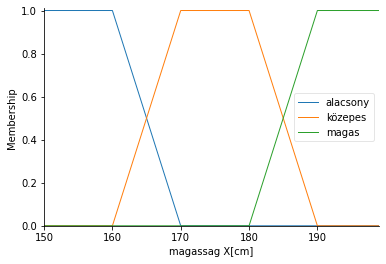

In [2]:
#@title
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

x                = np.arange(150, 200, 1)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

## Fuzzy halmazok

Ha úgy itélik meg, hogy a tagsági függvény érték is túl precíz a valóságban, akkor az elemekhez a tagsági függvény érték helyett **intervallumot** rendelnek. Ez a módszer jeletősen növeli a számításigényt. Jelenleg nem foglalkozom ezzel a módszerrel, de hogy el tudjuk képzelni mit jelent ez, egy képpel tudom illusztrálni.



In [3]:
(170-161) /(170-160)

0.9


<a name="fuzzifikacio"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzifikálás, Fuzzyfikáció <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Gyakorlatilag meghatározzuk a tagsági függvényeket, és az egyes crisp értékeket hozzájuk rendeljük. Alább a testmagasság egy lehetséges fuzzifikációja.

$A$ = {alacsony, közepes, magas}
<br>

$$
A_1(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \leq 150 \\
        \frac{170-x}{170-160} & \mbox{ha } \ 160 \leq x \leq 170 \\
        0 & \mbox{ha } \ 170 \leq x
    \end{array}
\right.
$$

Ezért $A_1(175) = (170-165) /(170-160) = 0.5$



Magassag['alacsony'](3) : 	0.50
Magassag['közepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


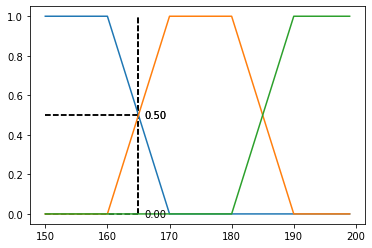

In [4]:

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(165)

In [5]:
interact(membershipDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), Output()), _dom_classes=('widg…

## Axiómák

A: az X fuzzy halmaza

Definíció szerint 𝑥 ∈ 𝑋-nek az A halmazhoz tartozásának mértéke: A(x)
Ekkor az A halmaz c típusú komplemense ca(x) az az érték, amilyen
mértékben x nem tartozik A-hoz. A Fuzzy komplemens: 𝑐: 0,1 → 0,1 függvény ∀𝐴(𝑥) tagsági függvény értékhez tetszőleges „A” fuzzy halmaz esetén a 𝑐 𝐴 𝑥 értéket rendeli hozzá.

$c1$ axióma: $c(0) = 1$ és $c(1) = 0$ (peremfeltétel)

$c2$ axióma: $\forall, b \in [0,1]$ esetén
ha $a \leq b$ akkor $c(a) \geq c(b)$ (monotonitás)

$c2$ azt írja elő, hogy a komplemens monoton csökkenő legyen: az $A$ halmaz
tagsági függvény értékének növekedésével a komplemens $c(a)$ értéke nem
nőhet.

**Egyensúlyi pont**: az az $a$ érték amire $c(a) = a$
Zadehnél $a = 0.5$ az egyensúlyi pont.

<br>

<a name="fuzzy_metszetek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy metszetek (A t-normák)

A fuzzy metszetek minimálisan elvárt tulajdonságait axiómák fogalmazzák meg, amelyek a Boole metszet fogalom természtes általánosítását adják.

$$t: [0,1] \times [0,1] \rightarrow [0,1]$$

$t_1$ axióma: $(t(a,1) = a, \forall a \in [0,1]$-re (peremfeltétel)

$t_2$ axióma: $b \leq c$-ből következik, hogy $t(a,b) \leq t(a,c), \forall a, b,c \in [0,1]$ (monotonitás)

$t_3$ axióma: $(t(a,b) = t(b,a), \forall a,b \in [0,1]-$-re (kommutativitás)

$t_4$ axióma: $(t(a,t(b,c)) = t(t((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativitás)

<br>

$t_2$ és $t_3$ azt a követelményt fejezi ki, hogy ha $A$-ban vagy $B$-ben a tagsági érték csökken, az nem eredményezheti a metszet $A \cap B$ növekedését.

<br>

Zadeh-féle metszet:

$$ t(a,b) = min(a,b) $$

Algebrai szorzat:

$$ t(a,b) = ab $$

Korlátos különbség:

$$ t(a,b) = max(0,a+b-1) $$

Példák:






Magassag['alacsony'](3) : 	0.50
Magassag['közepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


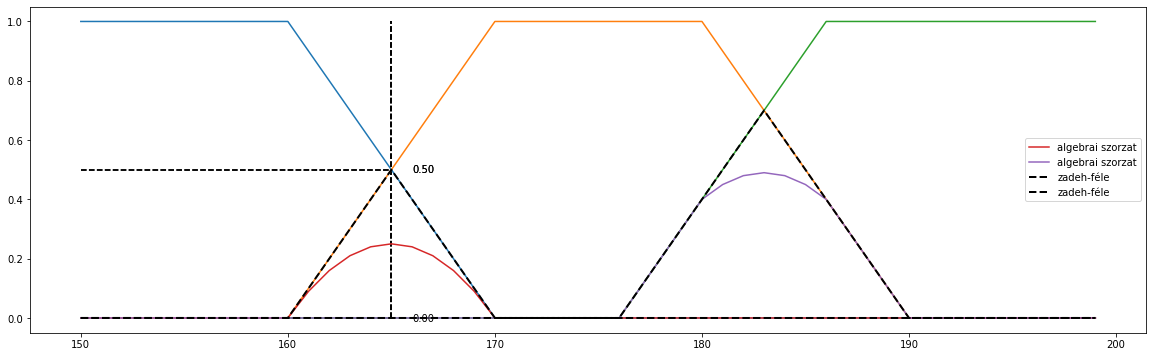

In [6]:



#@title
def membershipANDDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  algebrai = np.asarray(container[0])*np.asarray(container[1])
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  algebrai = np.asarray(container[1])*np.asarray(container[2])
  plt.plot(x, algebrai, label = 'algebrai szorzat')


  # zadeh féle fuzzy metszet
  zadeh = np.minimum(np.asarray(container[0]),np.asarray(container[1]))
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')

  zadeh = np.minimum(np.asarray(container[1]),np.asarray(container[2]))
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')



  plt.legend()

membershipANDDemo(165, 176, 186)

In [7]:
interact(membershipANDDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti…


<a name="fuzzy_uniok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy uniók (t-kononrmák)

A fuzzy uniók minimálisan elvárt tulajdonságait axiómák fogalmazzák meg.

$$s: [0,1] \times [0,1] \rightarrow [0,1]$$

$s_1$ axióma: $(s(a,1) = a, \forall a \in [0,1]$-re (peremfeltétel)

$s_2$ axióma: $b \leq c$-ből következik, hogy $s(a,b) \leq s(a,c), \forall a, b,c \in [0,1]$ (monotonitás)

$s_3$ axióma: $(s(a,b) = s(b,a), \forall a,b \in [0,1]-$-re (kommutativitás)

$s_4$ axióma: $(s(a,s(b,c)) = s(s((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativitás)


<br>

Zadeh-féle unió:

$$ s(a,b) = max(a,b) $$

Algebrai összeg:

$$ s(a,b) = a + b - ab $$

Korlátos összeg:

$$ s(a,b) = min(1,a+b) $$

Példák:



Magassag['alacsony'](3) : 	0.50
Magassag['közepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


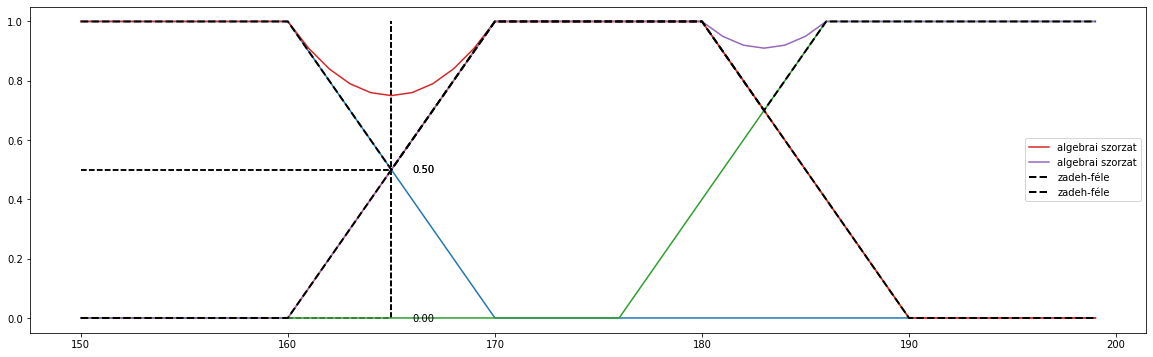

In [8]:
#@title
def membershipORDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  # zadeh féle fuzzy metszet
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')

  plt.legend()

membershipORDemo(165, 176, 186)

In [9]:
interact(membershipORDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti…


<a name="aggregacio"></a>

[vissza a tartalomhoz](#tartalom)

# Aggregáció

Több fuzzy halmaz megfelelő módon történő egyesítése által egyetlen fuzzy
halmazt állítanak elő.

$$h[0,1]^n \rightarrow [0,1], n \geq 2$$

Ha a $h$ függvény argumentumai az X alaphalmazon értelmezett $A_1(x), ..., A_n(x)$ fuzzy halmazok, akkor $h \forall x \in X$-re fuzzy halmazt állít elő az argumentumok tagsági értékeinek segítségével,

$$A(x) = h(A_1(x), ..., A_n(x))$$

Gyakorlatban ezt úgy érjük el, hogy szabályok konstruálunk és végül az összes szabály alapján előállítjuk az új fuzzy halmazokat.

# Az implikáció annyiban különbözik,

Az agregációtól, hogy egy változón létrehozott tagsági függvények értékeinek kiszámítására használja a szakirodalom az implikáció szót.

Míg az aggregáció az összes változóra érvényes szabály alapján létrehozott értékek előállítására és új fuzzy halmazhoz rendelésére használják.


Magassag['alacsony'](3) : 	0.80
Magassag['közepes'](3) : 	0.20
Magassag['magas'](3) : 	0.00


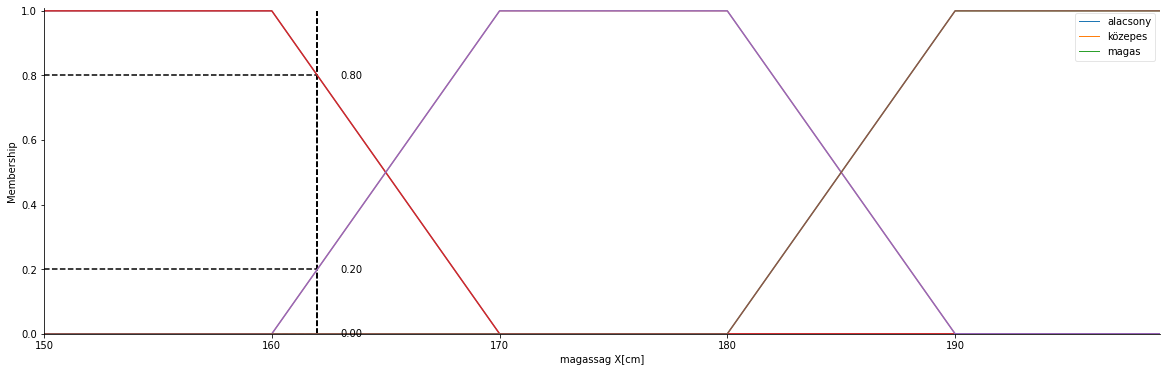

In [10]:
#@title


Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(162)

Testtomeg['sovány'](3) : 	0.30
Testtomeg['közepes'](3) : 	0.70
Testtomeg['kövér'](3) : 	0.00


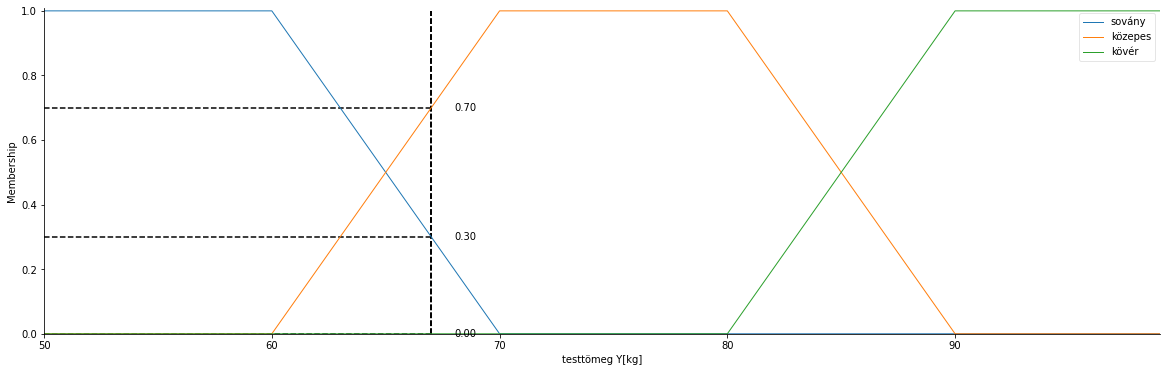

In [11]:
#@title

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtömeg Y[kg]')

Testtomeg.defuzzify_method = 'centroid'
Testtomeg.universe.mean()

Testtomeg['sovány'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['közepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['kövér'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Testtomeg.view()

def testtomegDemo(x_):
  for key in Testtomeg.terms.keys():
    plt.plot(x, Testtomeg[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 50, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

testtomegDemo(67)




A két fenti fuzzy halmaz egy lehetséges aggregációja



In [12]:
#@title
Allapot         = ctrl.Antecedent(np.arange(0, 40, 1), 'állapot subjektív pontszám')

Allapot.defuzzify_method = 'centroid'
Allapot.universe.mean()

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['normális'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['túlsúlyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])

# Allapot.view()

In [13]:
#@title
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])


In [14]:
magasság = 166
testtömeg = 88

Magassag['alacsony'](3) : 	0.40
Magassag['közepes'](3) : 	0.60
Magassag['magas'](3) : 	0.00
Testtomeg['sovány'](3) : 	0.00
Testtomeg['közepes'](3) : 	0.20
Testtomeg['kövér'](3) : 	0.80
IF magassag[magas] AND testtomeg[sovány] THEN allapot[anorexia]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[sovány] THEN allapot[normális]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[közepes] AND testtomeg[közepes] THEN allapot[normális]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[magas] AND testtomeg[kövér] THEN allapot[normális]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[kövér] THEN allapot[túlsúlyos]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
Állapot  : 27.17424242424242
----------------------------------------
magassag : 166
testtomeg : 88



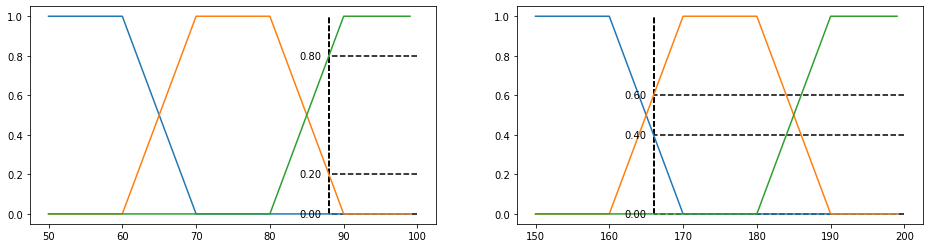

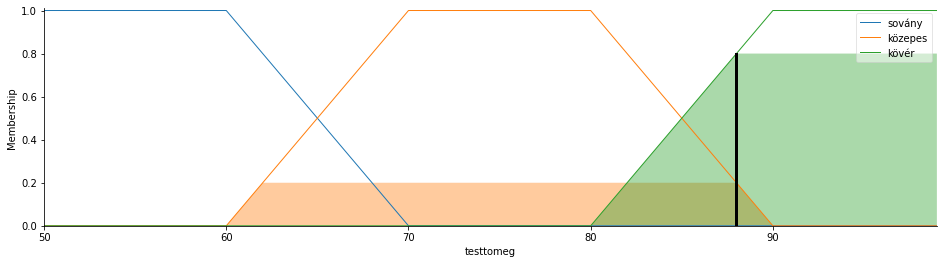

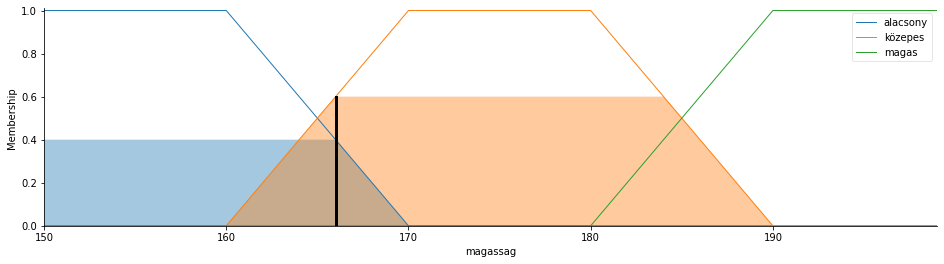

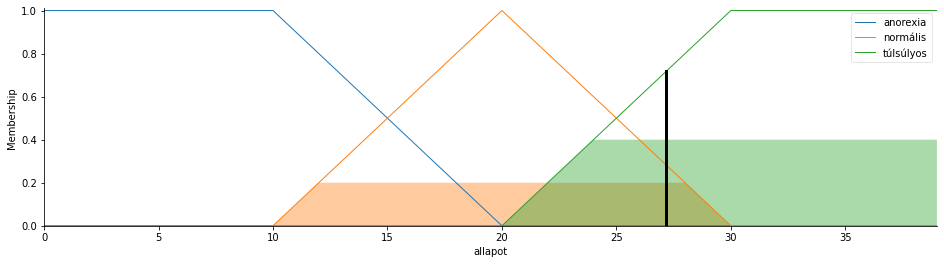

In [15]:
#@title

plt.rcParams["figure.figsize"] = (16,4)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

Testtomeg['sovány'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['közepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['kövér'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['normális'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['túlsúlyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])



# rules
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)


def testtomegDemo(x1_):

  x1 = np.arange(50, 100, 1)

  for key in Testtomeg.terms.keys():
    ax1.plot(x1, Testtomeg[key].mf)

    xv = x1_

    value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

    ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



#---------------------------------------------------------------------------


def magassagDemo(x2_):

  x2 = np.arange(150, 200, 1)

  for key in Magassag.terms.keys():
    ax2.plot(x2, Magassag[key].mf)

    xv = x2_

    value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

    ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


magassagDemo(magasság)

testtomegDemo(testtömeg)

#---------------------------------------------------------------------------


# a szabályok
print(rule1)
print(rule2)
print(rule3)
print(rule4)
print(rule5)

# két szabályunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['magassag'] = magasság
simulation.input['testtomeg'] = testtömeg

simulation.compute()

print('----------------------------------------')
print('Állapot  :', simulation.output['allapot'])
print('----------------------------------------')
print(simulation.input)


Testtomeg.view(sim = simulation)
Magassag.view(sim = simulation)
Allapot.view(sim = simulation)


In [16]:
#@title
def demo(a1, a2, px=16, py=4):
  plt.rcParams["figure.figsize"] = (px,py)

  magasság = a1
  testtömeg = a2

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

  Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

  Testtomeg['sovány'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
  Testtomeg['közepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
  Testtomeg['kövér'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

  Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

  Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
  Allapot['normális'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
  Allapot['túlsúlyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])


  # rules
  rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

  rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
  rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
  rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

  rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])


  # plot
  fig, (ax1, ax2) = plt.subplots(1, 2)


  def testtomegDemo(x1_):

    x1 = np.arange(50, 100, 1)

    for key in Testtomeg.terms.keys():
      ax1.plot(x1, Testtomeg[key].mf)

      xv = x1_

      value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

      # print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

      ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



  #---------------------------------------------------------------------------


  def magassagDemo(x2_):

    x2 = np.arange(150, 200, 1)

    for key in Magassag.terms.keys():
      ax2.plot(x2, Magassag[key].mf)

      xv = x2_

      value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

      # print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

      ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


  magassagDemo(magasság)

  testtomegDemo(testtömeg)

  #---------------------------------------------------------------------------


  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['magassag'] = magasság
  simulation.input['testtomeg'] = testtömeg

  simulation.compute()

  # print('----------------------------------------')
  # print('Állapot  :', simulation.output['allapot'])
  # print('----------------------------------------')
  # print(simulation.input)


  Testtomeg.view(sim = simulation)
  Magassag.view(sim = simulation)
  Allapot.view(sim = simulation)

  return simulation

In [17]:
#@title
a1 = widgets.IntSlider(min=150, max=200, step=1, value=166)
a2 = widgets.IntSlider(min=50, max=100, step=1, value=88)
px = widgets.IntSlider(min=8, max=15, step=1, value=11)
py = widgets.IntSlider(min=2, max=10, step=1, value=3)

ui = widgets.HBox([a1, a2, px, py])

out = widgets.interactive_output(demo, {'a1': a1, 'a2': a2, 'px': px, 'py': py})

display(ui, out)


Output()

## Aggregáció (folyt.)

A fenti példában láttauk , hogy A1(testtömeg) és A2(magasság) együttesen adták a hozzárendelési szabályokat.


```
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])
```

Most csak az 5 szabályt figyelembe véve nézzük meg, hogy mi a hozzárendelési szabály és hogyan alakul az értékük.

```
rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])
```

$\mu(X_{1_1} = 166) = 0.4$ magasság, alacsony

$\mu(X_{1_2}= 166) = 0.6$ magasság, közepes

$\mu(X_{1_3}= 166) = 0.0$ magasság, magas

$\mu(X_{2_1}= 166) = 0.0$ testtömeg, sovány

$\mu(X_{2_1}= 166) = 0.2$ testtömeg, közepes

$\mu(X_{2_2}= 166) = 0.8$ testtömeg, kövér

ezért

$$w_1 = max(0.4, 0.8) = 0.4$$, az Állapot változó 'túlsúlyos' tagsági függvényéhez tartozó érték.

Egy másik miatt pedig

```
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
```


$$w_2 = max(0.6, 0.2) = 0.2$$, az Állapot változó 'normális' tagsági függvényéhez tartozó érték.








# Defuzzifikáció

A tagsági függvényekhez tartozó [0, 1] értéke folytonos értékekké alakítása.

$$ y = \sum_{i=1}^{n}w_i*Y_B$$

Ahol $Y_B$ az aggregáció után kapott kimeneti halmaz.

In [19]:
mfx1 = Allapot.__getitem__('normális').mf
mfx2 = Allapot.__getitem__('túlsúlyos').mf

mx  = np.arange(0, mfx1.size, 1)

defuzzification1_centroid = fuzzy.defuzz(mx, mfx1, 'centroid')
defuzzification2_centroid = fuzzy.defuzz(mx, mfx2, 'centroid')

print('cog[normális]  =', defuzzification1_centroid)
print('cog[túlsúlyos]  =', defuzzification2_centroid)

# Állapot = w1 * COG(Állapot['anorixia']) + w2 * COG(Állapot['normális']) + w3 * COG(Állapot['túlsúlyos']) / (w1 + w2 + w3)

# Állapot = ( 0.0 * 5 + 0.2 * 20 + 0.4 * 25 ) / ( 0.0 + 0.2 + 0.4 )

# Állapot = 27.80

result = ( 0.0 * 5 + 0.2 * defuzzification1_centroid + 0.4 * defuzzification2_centroid ) / ( 0.0 + 0.2 + 0.4 )

print(result)


cog[normális]  = 19.999999999999996
cog[túlsúlyos]  = 31.702380952380953
27.801587301587297


In [20]:
simulation.output

OrderedDict([('allapot', 27.17424242424242)])

<a name="pelda2"></a>

[vissza a tartalomhoz](#tartalom)

# Példa 2

In [21]:
plt.rcParams["figure.figsize"] = (14,5)

In [22]:
# Create universe

Étel         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')

Felszolgálás = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')

Borravaló    = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

In [23]:
Borravaló.defuzzify_method = 'centroid'
Borravaló.universe.mean()

15.0

No handles with labels found to put in legend.


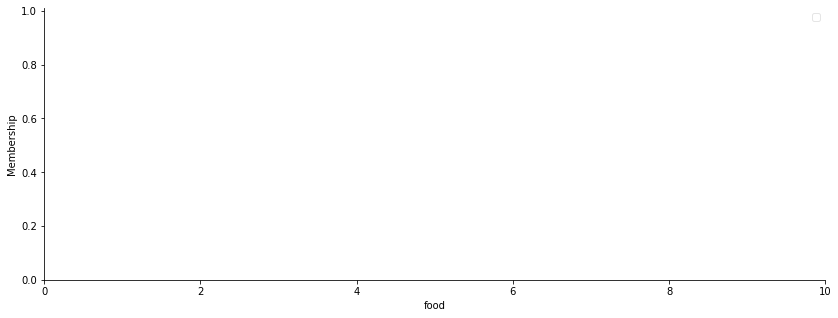

In [24]:
Étel.view()

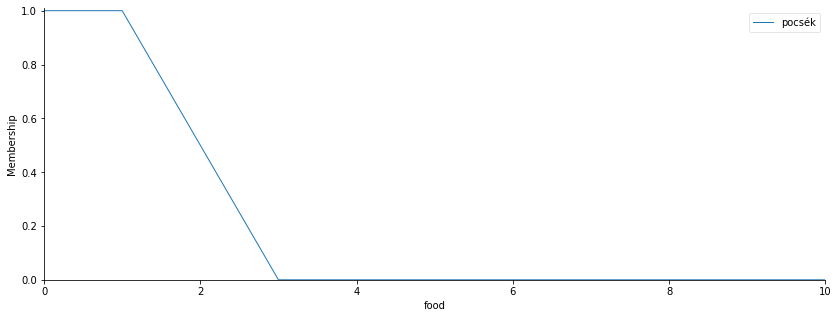

In [25]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

Étel['pocsék'] = fuzzy.trapmf(Étel.universe, [0, 0, 1, 3])

Étel.view()

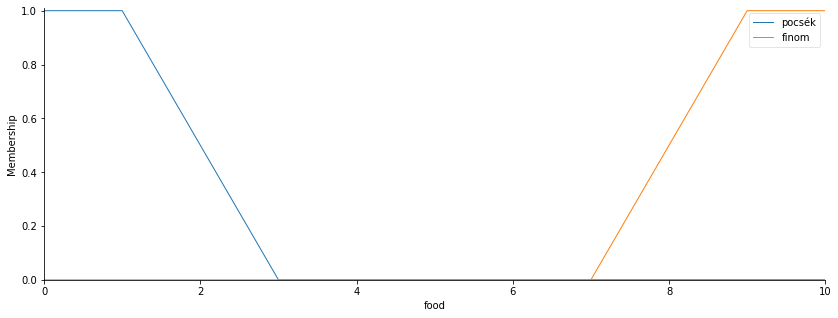

In [26]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{felhős})

Étel['finom'] = fuzzy.trapmf(Étel.universe, [7, 9, 10, 10])

Étel.view()

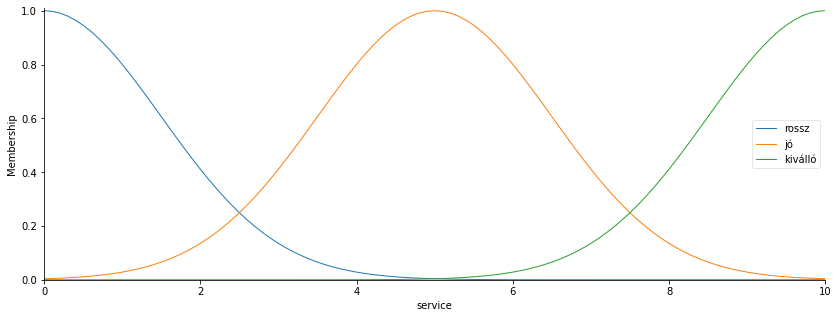

In [27]:
# Eddig megvagyunk a Étel változó tagsági fűggvényeivel {pocsék, finom}

# Most készítsük el a Felszolgálás tagsági függvényeit is {rossz, jó, kiválló}

# Felszolgálás['rossz']   = fuzzy.zmf(Felszolgálás.universe, 0, 5)

Felszolgálás['rossz']   = fuzzy.gaussmf(Felszolgálás.universe, 0, 1.5)

Felszolgálás['jó']      = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)

# Felszolgálás['kiválló'] = fuzzy.smf(Felszolgálás.universe, 5, 10)

Felszolgálás['kiválló'] = fuzzy.gaussmf(Felszolgálás.universe, 10, 1.5)

Felszolgálás.view()

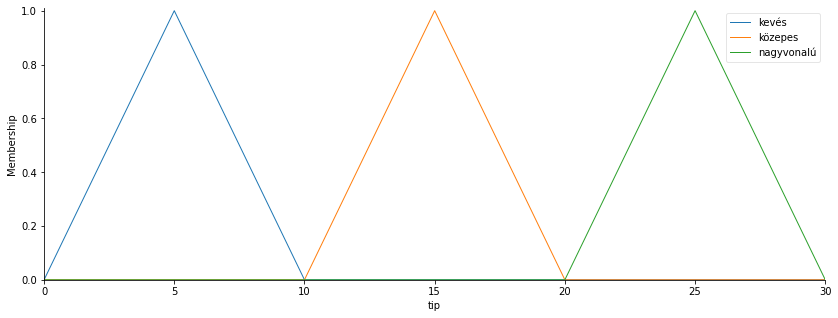

In [28]:
# Most készítsük el a Borravaló változó tagsági függvyényeit is {kevés, közepes, nagyvonalú}

Borravaló['kevés']      = fuzzy.trimf(Borravaló.universe, [0, 5, 10])
Borravaló['közepes']    = fuzzy.trimf(Borravaló.universe, [10, 15, 20])
Borravaló['nagyvonalú'] = fuzzy.trimf(Borravaló.universe, [20, 25, 30])

Borravaló.view()

In [29]:
# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])


In [30]:
def fuzzyDemo(Felszolgálás_ = 3, Étel_ = 8):

  # rule1 = setRules(Type)

  # a szabályok
  print(rule1)
  print(rule2)
  print(rule3)

  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['service'] = Felszolgálás_
  simulation.input['food'] = Étel_

  simulation.compute()

  print('----------------------------------------')
  print('borravaló  :', simulation.output['tip'])
  print('----------------------------------------')
  print(simulation.input)

  Felszolgálás.view(sim = simulation)
  Étel.view(sim = simulation)
  Borravaló.view(sim = simulation)

  return simulation


## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [31]:
print(Felszolgálás.universe.shape)

# Felszolgálás['jó'] = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
mfx = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
print(mfx.shape)

# mik a tagsággi függvényhez tartozó értékek a következ pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(Felszolgálás.universe, mfx, [1.0, 2.0, 3.5, 5.0])

(101,)
(101,)


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [32]:
print(Felszolgálás.__len__())
print(Felszolgálás.__getitem__('jó'))
a = Felszolgálás.__getitem__('jó')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni Felszolgálás objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('jó').mf, [1, 2, 3.5, 5])

101
service[jó]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [33]:
# ide kéne egy olyan plotot raknom ami mutatja az adott függvényt, és mutatja az egyes x, hez tartozó értéket minkét (ha egynél több átviteli függvényhez is tartozik az y)

OrderedDict([('rossz', service[rossz]), ('jó', service[jó]), ('kiválló', service[kiválló])])
Felszolgálás['rossz'](3) : 	0.14
Felszolgálás['jó'](3) : 	0.41
Felszolgálás['kiválló'](3) : 	0.00


Text(31, 0.41111229050718745, '0.41')

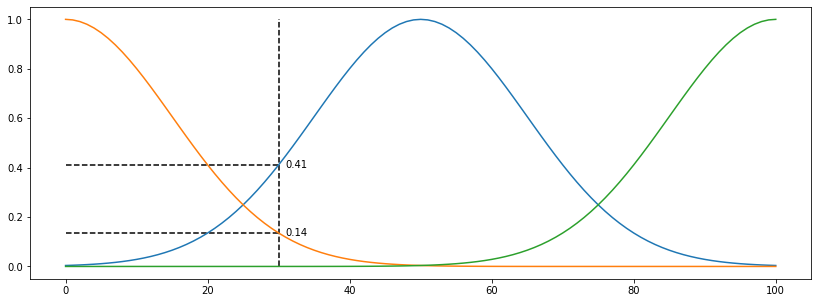

In [34]:
plt.plot(Felszolgálás['jó'].mf)
plt.plot(Felszolgálás['rossz'].mf)
plt.plot(Felszolgálás['kiválló'].mf)

print(Felszolgálás.terms)

# Elég bonyolultan de le lehet hívni Felszolgálás objektumból a magát a tagsági függvényt (mf)
y_service_good    = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('jó').mf, [3])
y_service_bad     = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('rossz').mf, [3])
y_service_exelent = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('kiválló').mf, [3])


print("Felszolgálás['rossz'](3) : \t{0:0.2f}".format(y_service_bad[0]))
print("Felszolgálás['jó'](3) : \t{0:0.2f}".format(y_service_good[0]))
print("Felszolgálás['kiválló'](3) : \t{0:0.2f}".format(y_service_exelent[0]))

plt.vlines(30, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_service_bad, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')
plt.hlines(y_service_good, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')

plt.text(31, y_service_bad[0], '{:0.2f}'.format(y_service_bad[0]), verticalalignment = 'center')
plt.text(31, y_service_good[0], '{:0.2f}'.format(y_service_good[0]), verticalalignment ='center')



In [35]:
Étel.terms

OrderedDict([('pocsék', food[pocsék]), ('finom', food[finom])])

In [36]:
# Elég bonyolultan de le lehet hívni Étel objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Étel.universe, Étel.__getitem__('finom').mf, [8])

array([0.5])

In [37]:
for key in Étel.terms.keys():
  print(key)

pocsék
finom


Étel['pocsék'](3) : 	0.00
Étel['finom'](3) : 	0.50


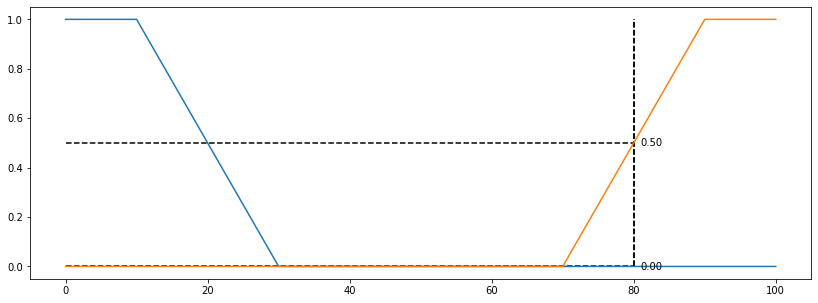

In [38]:
for key in Étel.terms.keys():
  plt.plot(Étel[key].mf)

  value = fuzzy.interp_membership(Étel.universe, Étel.__getitem__(key).mf, [8])

  print("Étel['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(80, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = 80, colors = 'k', linestyles = 'dashed')
  plt.text(81, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')




## A bemeneti változók és a hozzá tartozó értékeke a következőek



In [39]:
# Tehát a bemeneti változók és a hozzá tartozó értékeke a következőek

# Felszolgálás = 3 -> Felszolgálás['rossz'](0.14) és Felszolgálás['jó'](0.41)

# Étel = 8 -> Étel['pocsék](0.00) és Étel['finom'](0.5)

## Az aggregációs szabályok


In [40]:
# Tekintsük most át a szabályokat

# rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

# Felszolgálás['rossz'](0.14) OR Étel['pocsék'](0.00) -> Borravaló['kevés'] -> max(0.14, 0.00) = 0.14


# rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

# Felszolgálás['jó'](0.41) -> Borravaló['közepes'] = 0.41


# rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])

# Felszolgálás['kiválló'](0.00) OR Étel['finom'](0.5) -> Borravaló['nagyvonalú'] -> max(0.00, 0.50) = 0.50

## Aggregáció

In [41]:

# Tehát a három szabály alapján a kimeneti változó (Borravaló) mindhárom {kevés, közepes, nagyvonalú} tagsági függvény aktív lesz

# A fenti számítások alapján a következő képen

# rule1 -> Borravaló['kevés'] = 0.14
# rule2 -> Borravaló['közepes'] = 0.41
# rule3 -> Borravoló['nagyvonalú'] = 0.5


<a name="defuzzifikacio"></a>

## Defuzzifikáció<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

###(Mamdani-style)

A leggyakrabban használt de-fuzzyfikációs eljárás a középérték, vagy centroid módszer (center of gravity). Azt a pontot keresi meg, amely az aggregált területet két egyenlő részre bontja, a következő módon:

$$ COG = \frac{\int_{a}^{b} \mu_A(x)x\ dx}{\int_{a}^{b} \mu_A(x)\ dx}$$

<br>


In [42]:

# Borravaló = w1 * COG(Borravaló['kevés']) + w2 * COG(Borravaló['közepes']) + w3 * COG(Borravaló['nagyvonalú']) / (w1 + w2 + w3)

# Borravaló = ( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

# Borravaló = 18.42

( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

18.42857142857143

## Interaktív Demo

In [43]:
f = interact(fuzzyDemo, Felszolgálás_ = (0, 10), Étel_ = (0, 10));

interactive(children=(IntSlider(value=3, description='Felszolgálás_', max=10), IntSlider(value=8, description=…

In [44]:
sim = f.widget.result

In [45]:
type(sim)

skfuzzy.control.controlsystem.ControlSystemSimulation

In [46]:
# a sim objektumból a végeredményt így lehetem visszakapni

# legfőképpen azt, hogy a Borravaló objektum egyes tagsági függvényein milyen értékek vannak
# és azt, hogy a hozzá tartozó érték alapján a különböző függvény alatti terület számítáási módszerekkel
# (itt most csak COG) milyen de-fuzzyfikációs értéket kap

In [47]:
sim.output

OrderedDict([('tip', 18.00589051927782)])

## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [48]:

# Ez kiértékelés nagyobb felbontással is elvégezhető te több számítással jár

felszolgalas_space = np.linspace(0, 10, 10)
etel_space = np.linspace(0, 10, 10)
x, y = np.meshgrid(felszolgalas_space, etel_space)
z = np.zeros_like(x)


# Kiszámítjuk a rendszer kimeneteti értékét a két bemeneti változó függvényében
for i in range(10):
  for j in range(10):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

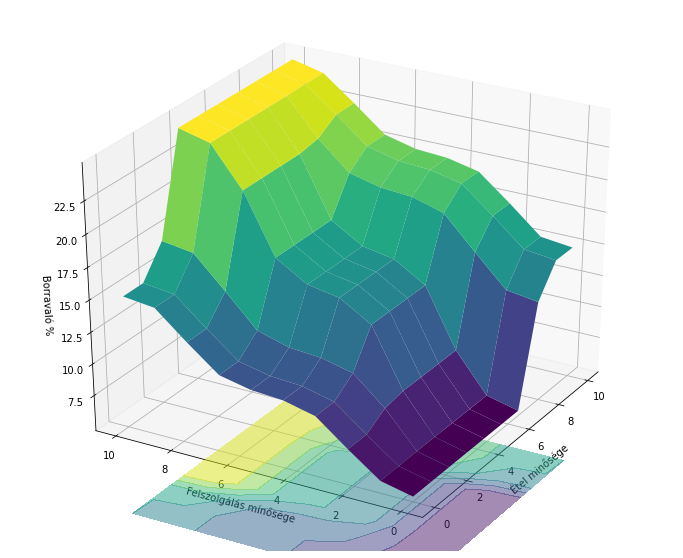

In [49]:
# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Étel minősége')
ax.set_ylabel('Felszolgálás mínősége')
ax.set_zlabel('Borravaló %')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)

## Surface Graphic

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [51]:
# A kiértékelés nagyobb felbontással is elvégezhető de több számítással jár

service = np.linspace(0, 10, 20)
food    = np.linspace(0, 10, 20)

x, y = np.meshgrid(service, food)

z = np.zeros_like(x)

z.shape

(20, 20)

In [52]:
# Az előzőnél nagyobb felbontásban, ugyan az kisérlet.

# A két bemeneti változót 20 egyenlő lépésben vizsgálva az összes lehetséges
# kombinációra kiszámolt értékek. Majd ezeket fogom ábrázolni egy 3 dimenziós
# interaktív program segítségével

for i in range(len(service)):
  for j in range(len(food)):
    sim.input['service'] = x[i, j]
    sim.input['food'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

# Ez az ábrázolási mód bár látványos, kettőnél több bemeneti változónál
# többet nem tudunk ábrázolni, így használhatósága erősen korlátozott.
# Az alábbi példát inkább didaktikai célból hoztam létre

In [53]:
%%capture
!pip install plotly
!pip install chart-studio

In [54]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

In [55]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = 'A kimeneti változó értéke a két bemeneti változó függvényében', autosize=False,
                  width = 700, height = 500,
                  scene = dict(
                    xaxis_title = 'food',
                    yaxis_title = 'service',
                    zaxis_title = 'tip %'),
                  margin = dict(l = 65, r = 50, b = 65, t = 60))

fig.show()

<a name="todo"></a>

[vissza a tartalomhoz](#tartalom)

## ToDo

1. Tanuló adatokon - X, y - értékpárokon végzett tanítás és szabályok kialakítása. Illetve a tanult adatokon visszaellenőrizni a rendszer pontosságát. A tankönyvben ezt a vizrendszer foszfortalmát mérő példában látható.

2. A logikai alapműveletek Fuzzy halmazokkal részt ábrázolni is a könyebb megértés céljából. Az ötletet a következő ábra adta.

<img src="https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/kepek/8820/Slide16.GIF"> 






<a name="takagi_sugeno_rendszer"></a>

[vissza a tartalomhoz](#tartalom)

# Takagi-Sugeno rendszer <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Erről a témáról szerettem volna bővebben is írni és leprogramozni, de sajnos nem jutott rá idő. Pedig érdemes lenne foglalkozni vele.

Röviden saját szavakkal, a kiértékelési függvény nem fuzzy hallmaz hanem valamilyen, vagy bármilyen függvény lehet.
1. Gyakorlatilag elkerüljük a De-fuzzifikációt
2. Nagyon érdekes, constans, lineáris, vagy nem lineáris fügvényeket is készíthetünk.
3. Pythonban nagyon könnyű implementálni


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Fuzzy Inference Part 4
<br>
https://www.youtube.com/watch?v=Q6QDVIwztyU


Math AP®︎/College Statistics Confidence intervals Confidence intervals for proportions
<br>
https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/conditions-for-valid-confidence-intervals

Getting Started with Fuzzy Logic Toolbox (Matlab)
<br>
https://www.youtube.com/watch?v=LupUhRJo_sU

How to work with Fuzzy Membership functions in Matlab
<br>
https://www.youtube.com/watch?v=vG3w4JVAKa0

------------

[1]
Fuzzy Logic Toolbox for Python API
<br>
https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html

------------


Digitális Tankönyvtár - Fuzzy rendszerek
Kóczy T. László, Tikk Domonkos
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tkt/fuzzy-rendszerek-fuzzy/ch03.html


Digitális Tankönyvtár - A bizonytalansági következtetés egyéb módszerei
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/ch14s07.html








```
# Köszönöm a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```
